In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

In [2]:
import numpy as np
import pickle
import pandas as pd
import json

In [3]:
df_cr = pd.read_csv("conf_data_cr.csv", index_col=[0])
df_siepa = pd.read_csv("conf_data_siepa.csv", index_col=[0])
df_xyg6 = pd.read_csv("conf_data_xyg6.csv", index_col=[0])
df_xyg7 = pd.read_csv("conf_data_xyg7.csv", index_col=[0])

In [4]:
def err_our(df):
    return (
        + df.T["GMTKN55"]     * 12
        + df.T["MR-MGM-BE4"]  * 3
        + df.T["MR-MGN-BE17"] * 2
        + df.T["MR-TM-BE13"]  * 3
        + df.T["SR-MGM-BE9"]  * 2
        + df.T["SR-TM-BE17"]  * 3
    ) / 25

## Plot total charts

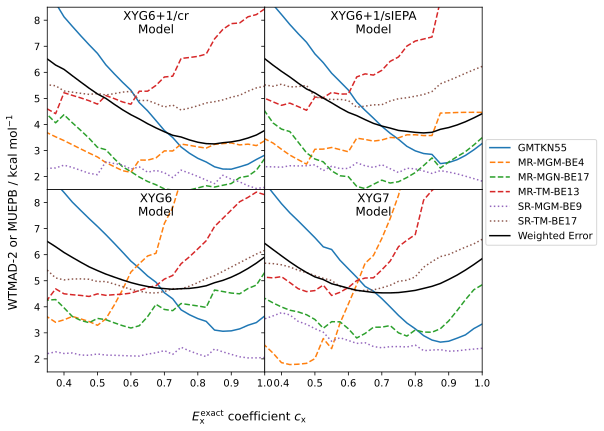

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6), gridspec_kw={"wspace": 0, "hspace": 0})
for model, df, idx in (
        ("XYG6+1/cr", df_cr, (0, 0)),
        ("XYG6+1/sIEPA", df_siepa, (0, 1)),
        ("XYG6", df_xyg6, (1, 0)),
        ("XYG7", df_xyg7, (1, 1))):
    ax = axs[idx[0], idx[1]]
    if idx == (0, 0):
        ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"   ], label="GMTKN55"   )
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], label="MR-MGM-BE4" , linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], label="MR-MGN-BE17", linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], label="MR-TM-BE13" , linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], label="SR-MGM-BE9" , linestyle=":")
        ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], label="SR-TM-BE17" , linestyle=":")
        ax.plot(np.array(df.columns, dtype=float), err_our(df),        label="Weighted Error", color="black")
    else:
        ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"   ], )
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], linestyle="--")
        ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], linestyle=":")
        ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], linestyle=":")
        ax.plot(np.array(df.columns, dtype=float), err_our(df),        color="black")
    ax.text(0.675, 7.5, model + "\nModel", ha="center", ma="center", fontsize=12, )
    ax.set_ylim(1.5, 8.5)
    ax.set_xlim(0.35, 1)
    if idx[0] == 1:
        pass
    else:
        ax.set_xticks([])
        
    if idx[1] == 0:
        pass
    else:
        ax.set_yticklabels([])
    # ax.set_title(f"{model} Model")
fig_legend = fig.legend(bbox_to_anchor=(1, 0.48, 0.2, 0.2))
fig_xlabel = fig.supxlabel(r"$E_\mathrm{x}^\mathrm{exact}$ coefficient $c_\mathrm{x}$")
fig_ylabel = fig.supylabel(r"WTMAD-2 or MUEPB / kcal mol${}^{-1}$")
outside_artists = [fig_legend, fig_xlabel, fig_ylabel]
fig.tight_layout()
fig.savefig("../plot-seq.pdf", bbox_extra_artists=outside_artists, bbox_inches="tight")
fig.savefig("../plot-seq.svg", bbox_extra_artists=outside_artists, bbox_inches="tight", transparent=True)

## XYG7 GMTKN55 only

In [6]:
df = pd.read_csv("conf_gmtkn55_xyg7.csv", index_col=[0]).T.sort_index().T

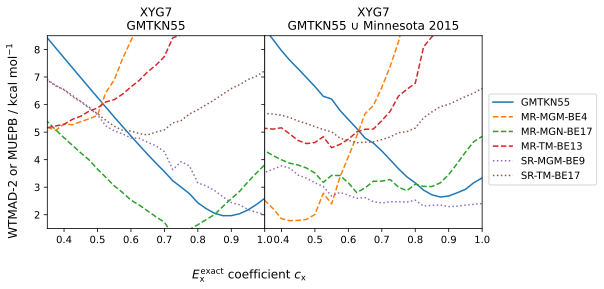

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), gridspec_kw={"wspace": 0, "hspace": 0})

ax = axs[0]
df = pd.read_csv("conf_gmtkn55_xyg7.csv", index_col=[0]).T.sort_index().T
ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"    ], label="GMTKN55"   )
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], label="MR-MGM-BE4" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], label="MR-MGN-BE17", linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], label="MR-TM-BE13" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], label="SR-MGM-BE9" , linestyle=":")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], label="SR-TM-BE17" , linestyle=":")
ax.set_ylim(1.5, 8.5)
ax.set_xlim(0.35, 1)
ax.set_title("XYG7\nGMTKN55")

ax = axs[1]
df = pd.read_csv("conf_data_xyg7.csv", index_col=[0]).T.sort_index().T
ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"    ])
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], linestyle=":")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], linestyle=":")
ax.set_ylim(1.5, 8.5)
ax.set_xlim(0.35, 1)
ax.set_title("XYG7\nGMTKN55 $\cup$ Minnesota 2015")
ax.set_yticklabels([])

fig_legend = fig.legend(bbox_to_anchor=(1, 0.48, 0.2, 0.2))
fig_xlabel = fig.supxlabel(r"$E_\mathrm{x}^\mathrm{exact}$ coefficient $c_\mathrm{x}$")
fig_ylabel = fig.supylabel(r"WTMAD-2 or MUEPB / kcal mol${}^{-1}$")
outside_artists = [fig_legend, fig_xlabel, fig_ylabel]

fig.tight_layout()
fig.savefig("../plot-seq-xyg7.pdf", bbox_extra_artists=outside_artists, bbox_inches="tight")
fig.savefig("../plot-seq-xyg7.svg", bbox_extra_artists=outside_artists, bbox_inches="tight", transparent=True)

## XYG6+1/cr GMTKN55 only

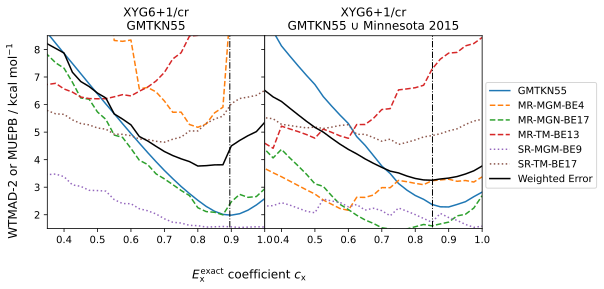

In [8]:
df = pd.read_csv("conf_gmtkn55_cr.csv", index_col=[0]).T.sort_index().T

fig, axs = plt.subplots(1, 2, figsize=(7, 4), gridspec_kw={"wspace": 0, "hspace": 0})

ax = axs[0]
df = pd.read_csv("conf_gmtkn55_cr.csv", index_col=[0]).T.sort_index().T
ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"    ], label="GMTKN55"   )
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], label="MR-MGM-BE4" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], label="MR-MGN-BE17", linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], label="MR-TM-BE13" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], label="SR-MGM-BE9" , linestyle=":")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], label="SR-TM-BE17" , linestyle=":")
ax.plot(np.array(df.columns, dtype=float), err_our(df),         label="Weighted Error", color="black")
ax.plot([0.895609, 0.895609], [0, 10], color="black", linewidth=1, linestyle="-.")
ax.set_ylim(1.5, 8.5)
ax.set_xlim(0.35, 1)
ax.set_title("XYG6+1/cr\nGMTKN55")

ax = axs[1]
df = pd.read_csv("conf_data_cr.csv", index_col=[0]).T.sort_index().T
ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"    ])
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], linestyle=":")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], linestyle=":")
ax.plot(np.array(df.columns, dtype=float), err_our(df),         color="black")
ax.plot([0.851546, 0.851546], [0, 10], color="black", linewidth=1, linestyle="-.")
ax.set_ylim(1.5, 8.5)
ax.set_xlim(0.35, 1)
ax.set_title("XYG6+1/cr\nGMTKN55 $\cup$ Minnesota 2015")
ax.set_yticklabels([])

fig_legend = fig.legend(bbox_to_anchor=(1, 0.52, 0.2, 0.2))
fig_xlabel = fig.supxlabel(r"$E_\mathrm{x}^\mathrm{exact}$ coefficient $c_\mathrm{x}$")
fig_ylabel = fig.supylabel(r"WTMAD-2 or MUEPB / kcal mol${}^{-1}$")
outside_artists = [fig_legend, fig_xlabel, fig_ylabel]

fig.tight_layout()
fig.savefig("../plot-seq-cr.pdf", bbox_extra_artists=outside_artists, bbox_inches="tight")
fig.savefig("../plot-seq-cr.svg", bbox_extra_artists=outside_artists, bbox_inches="tight", transparent=True)

## XYG6+1 against cr

In [9]:
df = pd.read_csv("conf_data_cr_of_cr.csv", index_col=[0]).T.sort_index().T

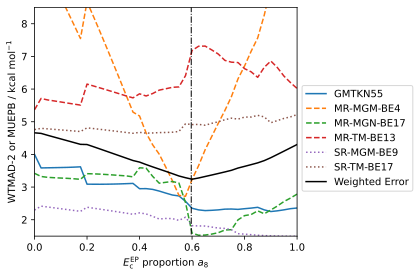

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
df = pd.read_csv("conf_data_cr_of_cr.csv", index_col=[0]).T.sort_index().T
ax.plot(np.array(df.columns, dtype=float), df.T["GMTKN55"    ], label="GMTKN55"   )
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGM-BE4" ], label="MR-MGM-BE4" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], label="MR-MGN-BE17", linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], label="MR-TM-BE13" , linestyle="--")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-MGM-BE9" ], label="SR-MGM-BE9" , linestyle=":")
ax.plot(np.array(df.columns, dtype=float), df.T["SR-TM-BE17" ], label="SR-TM-BE17" , linestyle=":")
ax.plot(np.array(df.columns, dtype=float), err_our(df),        color="black", label="Weighted Error")
ax.plot([0.596938, 0.596938], [0, 10], color="black", linewidth=1, linestyle="-.")
ax.set_ylim(1.5, 8.5)
ax.set_xlim(0.0, 1)
ax.legend(bbox_to_anchor=(1, 0.48, 0.2, 0.2))
ax.set_xlabel(r"$E_\mathrm{c}^\mathrm{EP}$ proportion $a_8$")
ax.set_ylabel(r"WTMAD-2 or MUEPB / kcal mol${}^{-1}$")
fig.tight_layout()
# ax.set_title("XYG7\nGMTKN55")
fig.savefig("../plot-seq-cr-proportion.pdf", bbox_inches="tight")
fig.savefig("../plot-seq-cr-proportion.svg", bbox_inches="tight", transparent=True)

In [11]:
with open("conf_data_cr_of_cr.dat", "rb") as f:
    dat = pickle.load(f)
df = pd.read_csv("conf_data_cr_of_cr.csv", index_col=[0]).T.sort_index().T

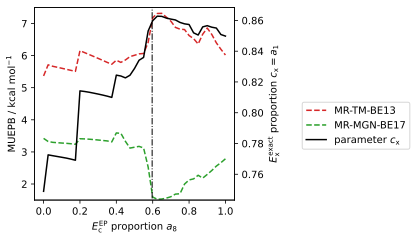

In [12]:
fig, ax = plt.subplots(figsize=(4.2, 3.5))
ax.plot(np.array(df.columns, dtype=float), df.T["MR-TM-BE13" ], label="MR-TM-BE13" , linestyle="--", color="C3")
ax.plot(np.array(df.columns, dtype=float), df.T["MR-MGN-BE17"], label="MR-MGN-BE17", linestyle="--", color="C2")
ax.plot([0.596938, 0.596938], [0, 10], color="black", linewidth=1, linestyle="-.")
ax.set_xlabel(r"$E_\mathrm{c}^\mathrm{EP}$ proportion $a_8$")
ax.set_ylabel(r"MUEPB / kcal mol${}^{-1}$")
ax.set_ylim(1.5, 7.5)
ax = ax.twinx()
ax.plot(*np.array(sorted([(key, val.x[0]) for (key, val) in dat.items()])).T, label="parameter $c_\mathrm{x}$", color="black")
ax.set_ylabel(r"$E_\mathrm{x}^\mathrm{exact}$ proportion $c_\mathrm{x} = a_1$")
legend = fig.legend(bbox_to_anchor=(1.2, 0.4, 0.2, 0.2))
fig.tight_layout()
outside_artists = [legend]
fig.savefig("../plot-seq-cr-against-cx.pdf", bbox_extra_artists=outside_artists, bbox_inches="tight")
fig.savefig("../plot-seq-cr-against-cx.svg", bbox_extra_artists=outside_artists, bbox_inches="tight", transparent=True)